In [1]:
from pylab import *
import numpy as np
import nylib, nylib2
import pandas as pd
import UF_7T_animal_processing as syngap
import nibabel as nib

In [153]:
# Define data path
dataPath = '/data/UF/7T_2024_data/20240119/20240119_112739_RE0972_glycoNOE_1_1'
mouse_id = 'RE0972'
savePath = '%s/../../processed_data/%s'%(dataPath, mouse_id)
savePath2 = '/data/home/yadav_lab_2/Documents/scans'
savePath3 = '/data/home/yadav_lab_2/Documents/scans2'
from pathlib import Path
Path("%s"%(savePath)).mkdir(parents=True, exist_ok=True)

In [69]:
import datetime
import time
expNumbers = range(1, 100)
expMethod = [None for ii in range(len(expNumbers))]
expRunTime = [None for ii in range(len(expNumbers))]
Comments = [None for ii in range(len(expNumbers))]

for ii, ei in enumerate(expNumbers):
    try:
        expMethod[ii] = nylib.BrukerPar('%s/%s'%(dataPath, ei), 'method', 'Method=')[:-1]        
        timeTemp0 = ((nylib.searchFile('%s/%s/acqp'%(dataPath, ei), b'2024' )).split()[1:3])
        timeTemp1 = str(b' '.join(timeTemp0))
        timeTemp2 = time.strptime(timeTemp1,"b'%Y-%m-%d %H:%M:%S.%f'")
        timeTemp3 = datetime.datetime.fromtimestamp(time.mktime(timeTemp2))
        expRunTime[ii] = timeTemp3.strftime('%Y-%m-%d, %H:%M:%S')
        Comments[ii] = nylib.searchFileNext('%s/%s/pdata/1/visu_pars'%(dataPath, ei), 'VisuSeriesComment=')
            
    except:
        pass
expTable = zip(expNumbers, expMethod, expRunTime, Comments)
df = pd.DataFrame(data = expTable, columns=['ExperimentNumber', 'Method', 'expRunTime','Comment'])
df['expRunTime'] = (pd.to_datetime(df['expRunTime']))
# df['expRunTime'] = df['expRunTime'].dt.time
df.sort_values(by=['expRunTime'])
df = df[df.Method.notnull()]
df

,ExperimentNumber,Method,expRunTime,Comment
0,1,<Bruker:FLASH>,2024-01-19 11:33:55,None
1,2,<Bruker:RARE>,2024-01-19 11:44:02,None
2,3,<Bruker:RARE>,2024-01-19 11:46:29,None
3,4,<Bruker:FieldMap>,2024-01-19 11:39:10,None
4,5,<Bruker:RARE>,2024-01-19 11:50:41,None
5,6,<Bruker:RAREst>,2024-01-19 12:21:14,None
6,7,<Bruker:MSME>,2024-01-19 12:24:16,None
7,8,<Bruker:RAREVTR>,2024-01-19 12:27:20,None
8,9,<Bruker:RAREst>,2024-01-19 12:57:40,None


In [70]:
# Load data, multislice scan is scan 2
multislice_scan_num = 3
from brukerapi.dataset import Dataset
data_multislice = np.squeeze(np.transpose((Dataset('%s/%d/pdata/1/'%(dataPath, multislice_scan_num))).data))


In [71]:
data_multislice.shape

(25, 128, 128)

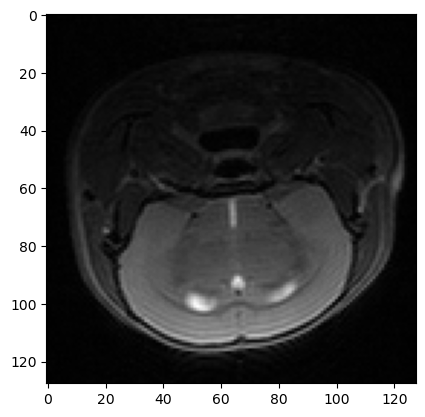

In [72]:
plt.imshow(data_multislice[12,:,:])

In [119]:
nib.load

SyntaxError: invalid syntax (301590001.py, line 1)

In [123]:
Vol=nib.load('NN4Kubiac_containsTutorial/TutorialMUNet/in_vivo/template/A0.nii.gz').header

In [124]:
print(Vol)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 192 256  96   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.1
qoffset_y       : 0.1
qoffset_z       : 0.1
srow_x          : [ 0.1  0.  -0.   0.1]
srow_y

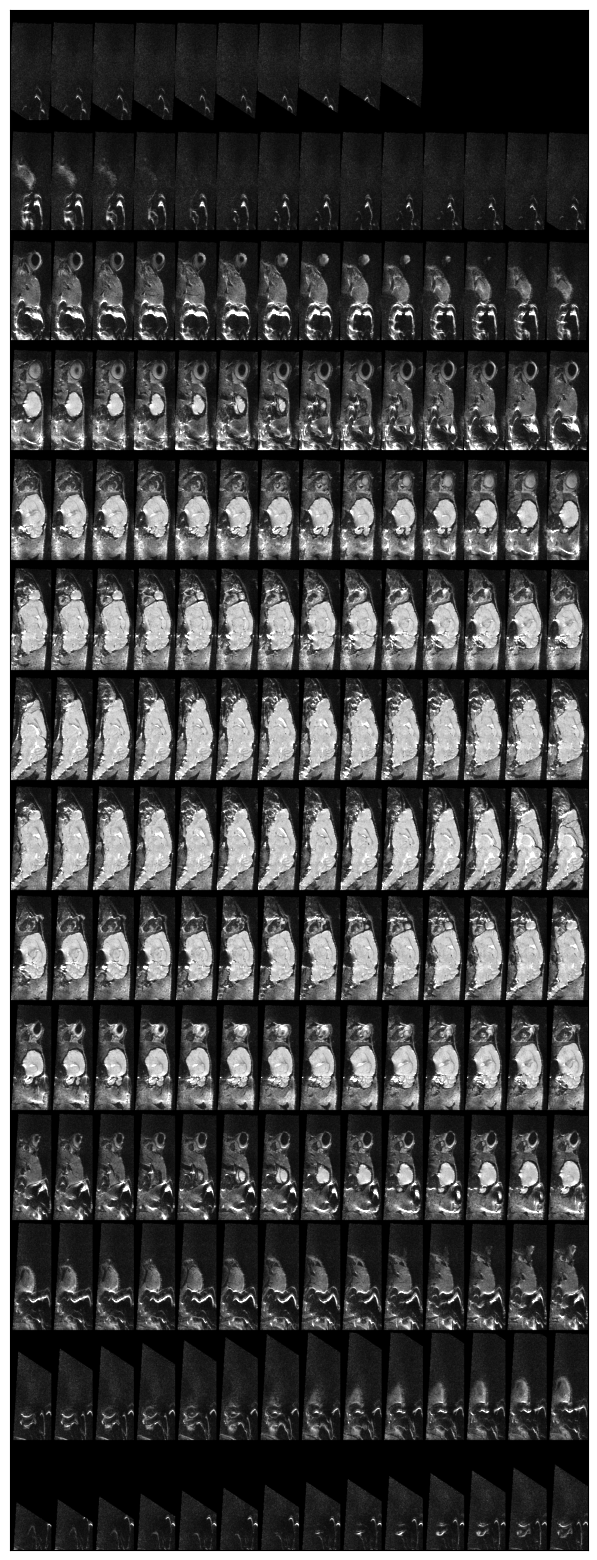

In [118]:
# check data

import cjlib
figure(figsize=(12,20))
cjlib.mmontage(Vol)

In [81]:
# save data in nifti format

Ir = transpose(data_multislice)

Ir.shape

ni_img = nib.Nifti1Image(Ir, affine=np.eye(4))

nib.save(ni_img, "%s/multislice_imageRE0972.nii"%(savePath2))

0.0

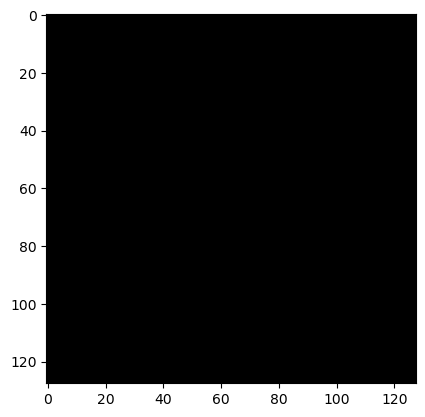

In [113]:
Mask=nib.load("MU-Net-R/multislice_image_Contra.nii.gz").get_fdata()

plt.imshow(Mask[:,:,18])
Mask.shape
Mask.max()

In [97]:
for i in range(25):
    print (i, Mask[:,:,i].max())

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0


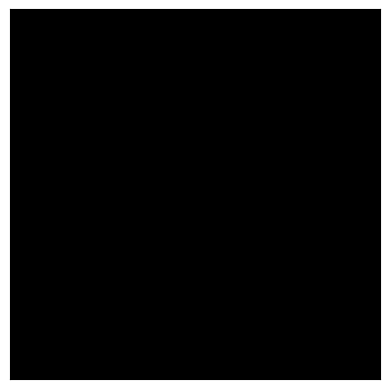

In [96]:
cjlib.mmontage(Mask.transpose())

In [156]:
Lab=nib.load("%s/multislice_imageRE0972.nii"%(savePath2)).get_fdata()
Lab.shape
x = Lab.transpose(0,2,1)
x.shape
# plt.imshow(Mask[:,:,12])


(128, 25, 128)

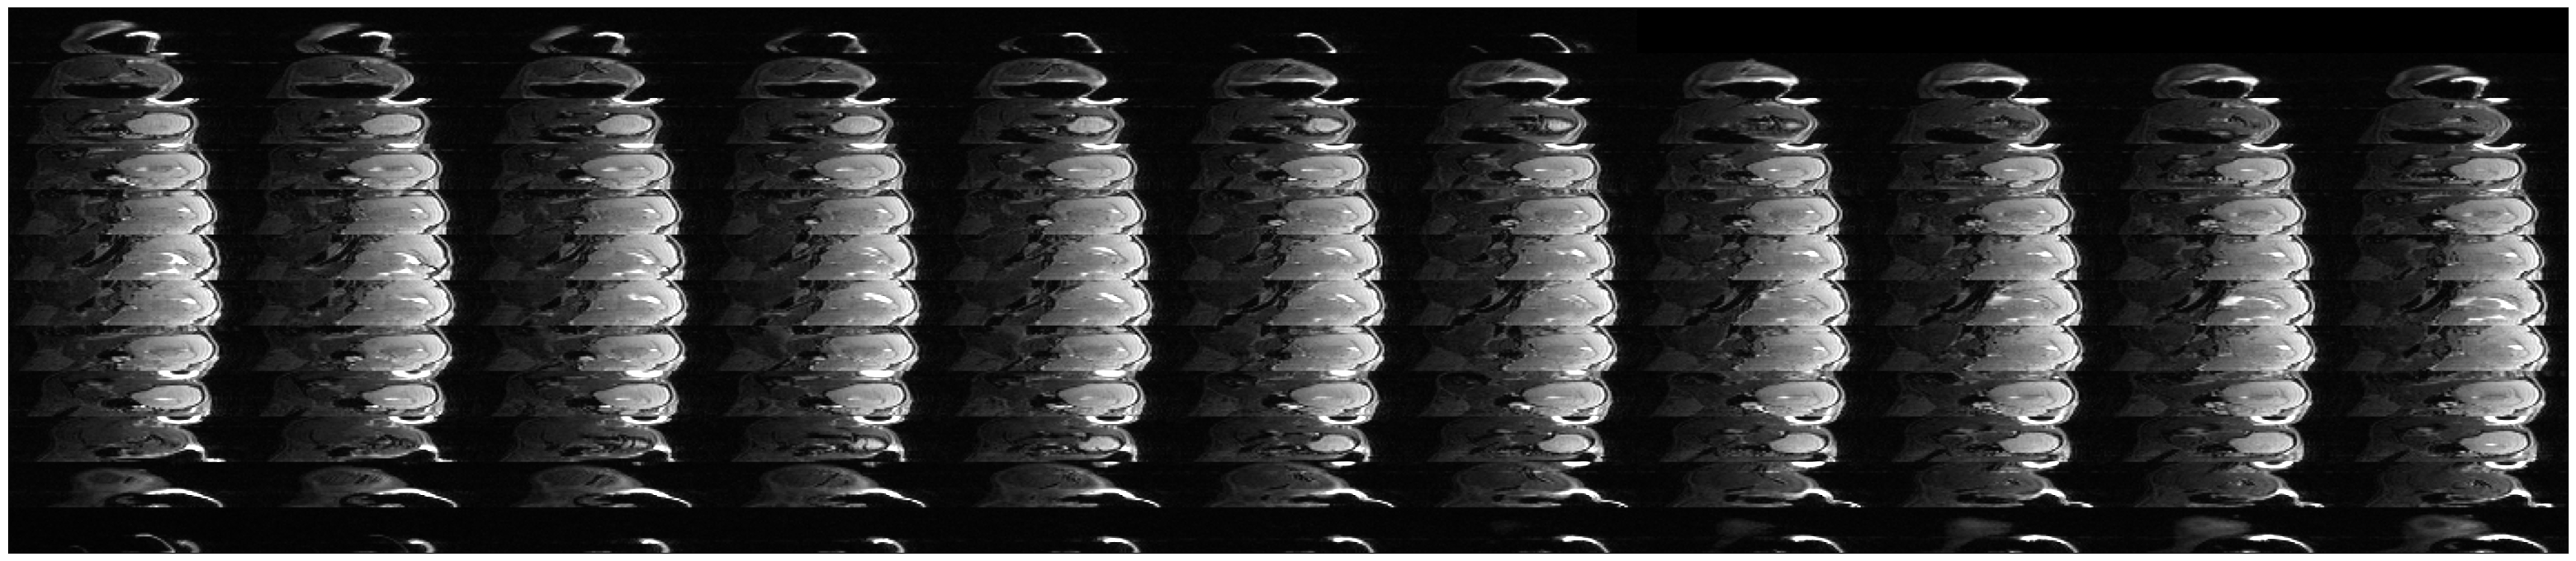

In [157]:

figure(figsize=(40,40))
cjlib.mmontage(x)

In [158]:
ni_img = nib.Nifti1Image(x, affine=np.eye(4))

nib.save(ni_img, "%s/multislice_imageRE0972.nii"%(savePath3))